In [9]:
# Visualize word-level stretch results
def visualize_word_stretch_results(word_results, sound):
    """Create visualization showing word-level stretch analysis"""
    
    if not word_results:
        print("No word results to visualize")
        return
    
    fig, axes = plt.subplots(3, 1, figsize=(15, 10))
    
    # Plot 1: Waveform with word boundaries and stretch indication
    times = sound.xs()
    axes[0].plot(times, sound.values[0], alpha=0.5, color='gray')
    
    for result in word_results:
        color = 'red' if result['is_stretched'] else 'green'
        axes[0].axvspan(result['start'], result['end'], alpha=0.3, color=color)
        axes[0].text(result['start'] + result['duration']/2, 0, result['word'], 
                    ha='center', va='center', fontsize=8, rotation=45)
    
    axes[0].set_title('Waveform with Word-Level Stretch Analysis')
    axes[0].set_ylabel('Amplitude')
    axes[0].legend(['Audio', 'Stretched', 'Normal'])
    
    # Plot 2: Stretch scores per word
    words = [r['word'] for r in word_results]
    stretch_scores = [r['stretch_score'] for r in word_results]
    colors = ['red' if r['is_stretched'] else 'green' for r in word_results]
    
    bars = axes[1].bar(range(len(words)), stretch_scores, color=colors, alpha=0.7)
    axes[1].axhline(y=0.38, color='orange', linestyle='--', label='Stretch Threshold')
    axes[1].set_title('Stretch Score per Word (sec/syllable)')
    axes[1].set_ylabel('Stretch Score')
    axes[1].set_xticks(range(len(words)))
    axes[1].set_xticklabels(words, rotation=45)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Prosodic features comparison
    intensity_stability = [r['prosodic_indicators']['intensity_stability'] for r in word_results]
    pitch_range = [r['prosodic_indicators']['pitch_range'] for r in word_results]
    
    x_pos = np.arange(len(words))
    width = 0.35
    
    axes[2].bar(x_pos - width/2, intensity_stability, width, label='Intensity Stability', alpha=0.7)
    axes[2].bar(x_pos + width/2, pitch_range, width, label='Pitch Range', alpha=0.7)
    axes[2].set_title('Prosodic Features per Word')
    axes[2].set_ylabel('Feature Value')
    axes[2].set_xticks(x_pos)
    axes[2].set_xticklabels(words, rotation=45)
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print(f"\\n📈 STRETCH ANALYSIS STATISTICS:")
    print(f"Total words analyzed: {len(word_results)}")
    print(f"Words with stretch: {sum(1 for r in word_results if r['is_stretched'])}")
    print(f"Average stretch score: {np.mean(stretch_scores):.3f} sec/syllable")
    print(f"Max stretch score: {max(stretch_scores):.3f} sec/syllable")
    print(f"Words above threshold: {sum(1 for s in stretch_scores if s > 0.38)}")

# Run visualization
if 'word_level_results' in locals() and word_level_results:
    visualize_word_stretch_results(word_level_results, sound)
else:
    print("Run the word-level analysis first to get results for visualization")

Run the word-level analysis first to get results for visualization


In [11]:
!pip install pyphen scipy
import pyphen

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.1 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 12.1 MB/s  0:00:00


In [12]:
# Test: Run word-level stretch analysis with Whisper + Parselmouth
def test_word_level_parselmouth_analysis():
    """Test the hybrid approach: Whisper for words + Parselmouth for prosodic features"""
    
    print("=== TESTING WORD-LEVEL STRETCH WITH PARSELMOUTH ===")
    
    # Step 1: Get Whisper transcript for word boundaries
    try:
        from openai_transcriber import transcribe_with_openai_timestamps
        print("🔄 Getting word timestamps from Whisper...")
        whisper_words = transcribe_with_openai_timestamps("Stretch 3.mp3")
        
        if not whisper_words:
            print("❌ No words from Whisper")
            return
            
        print(f"✅ Got {len(whisper_words)} words from Whisper")
        
        # Step 2: Analyze each word with Parselmouth
        print("🔄 Analyzing each word with Parselmouth prosodic features...")
        word_results = analyze_word_level_stretch_parselmouth(sound, whisper_words)
        
        # Step 3: Display results in a table
        print("\\n📊 WORD-BY-WORD STRETCH ANALYSIS:")
        print("-" * 80)
        print(f"{'Word':<12} {'Start':<6} {'End':<6} {'Dur':<5} {'Syl':<3} {'Stretch':<7} {'Status':<10}")
        print("-" * 80)
        
        stretched_count = 0
        for result in word_results:
            status = "STRETCH" if result['is_stretched'] else "Normal"
            if result['is_stretched']:
                stretched_count += 1
                
            print(f"{result['word']:<12} {result['start']:<6.2f} {result['end']:<6.2f} "
                  f"{result['duration']:<5.2f} {result['syllables']:<3d} "
                  f"{result['stretch_score']:<7.3f} {status:<10}")
        
        print("-" * 80)
        print(f"🎯 SUMMARY: {stretched_count}/{len(word_results)} words show stretch patterns")
        
        # Step 4: Compare with original approach
        print("\\n🔍 COMPARISON WITH ORIGINAL METHOD:")
        
        # Calculate original stretch scores (without prosodic enhancement)
        original_stretched = sum(1 for w in whisper_words 
                               if w['word'].isalpha() and 
                               (w['end'] - w['start']) / len(w['word'].split()) > 0.38)
        
        print(f"Original method (duration only): {original_stretched} stretched words")
        print(f"Parselmouth enhanced method: {stretched_count} stretched words")
        print(f"Difference: {stretched_count - original_stretched} words")
        
        return word_results
        
    except Exception as e:
        print(f"❌ Error: {e}")
        return None

# Run the test
if sound:
    word_level_results = test_word_level_parselmouth_analysis()
else:
    print("❌ No sound loaded - run previous cells first")

=== TESTING WORD-LEVEL STRETCH WITH PARSELMOUTH ===
🔄 Getting word timestamps from Whisper...
Using transcription model: gpt-4o-transcribe
Automatically switching to whisper-1 for word timestamp support...
Added word-level timestamp support
Transcription parameters: {'model': 'whisper-1', 'file': <_io.BufferedReader name='Stretch 3.mp3'>, 'response_format': 'verbose_json', 'language': 'en', 'timestamp_granularities': ['word']}
Response type: <class 'openai.types.audio.transcription_verbose.TranscriptionVerbose'>
Response attributes: ['__abstractmethods__', '__annotations__', '__class__', '__class_getitem__', '__class_vars__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__fields__', '__fields_set__', '__firstlineno__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '_

In [13]:
# NEW TEST: Word-level stretch analysis using Parselmouth + transcript
def analyze_word_level_stretch_parselmouth(sound, transcript_words):
    """Analyze stretch per word using Parselmouth prosodic features"""
    
    # Get intensity and pitch for the entire audio
    intensity = sound.to_intensity()
    pitch = sound.to_pitch()
    
    intensity_values = intensity.values[0]
    intensity_times = intensity.xs()
    pitch_values = pitch.selected_array['frequency']
    pitch_times = pitch.xs()
    
    word_stretch_results = []
    
    for word_data in transcript_words:
        word_text = word_data['word']
        start_time = word_data['start'] 
        end_time = word_data['end']
        
        # Extract prosodic features for this word's time segment
        word_intensity = extract_segment_features(intensity_times, intensity_values, start_time, end_time)
        word_pitch = extract_segment_features(pitch_times, pitch_values, start_time, end_time)
        
        # Analyze prosodic characteristics of this word
        word_analysis = analyze_word_prosody(word_text, start_time, end_time, word_intensity, word_pitch)
        
        word_stretch_results.append(word_analysis)
    
    return word_stretch_results

def extract_segment_features(times, values, start, end):
    """Extract prosodic features for a specific time segment"""
    mask = (times >= start) & (times <= end)
    return {
        'times': times[mask],
        'values': values[mask],
        'mean': np.nanmean(values[mask]) if np.any(mask) else 0,
        'std': np.nanstd(values[mask]) if np.any(mask) else 0,
        'duration': end - start
    }

def analyze_word_prosody(word, start, end, intensity_data, pitch_data):
    """Analyze prosodic stretch indicators for a single word"""
    import pyphen
    
    # Count syllables
    dic = pyphen.Pyphen(lang='en')
    syllables = len(dic.inserted(word).split('-'))
    if syllables == 0:
        syllables = 1
    
    duration = end - start
    
    # Calculate stretch score (duration per syllable)
    stretch_score = duration / syllables
    
    # Prosodic indicators of stretch
    prosodic_indicators = {
        'intensity_stability': 1 / (intensity_data['std'] + 0.1),  # More stable = more stretched
        'pitch_range': pitch_data['std'],  # Less variation might indicate stretch
        'intensity_mean': intensity_data['mean'],
        'pitch_mean': pitch_data['mean']
    }
    
    # Enhanced stretch classification using prosodic features
    base_stretch = stretch_score > 0.38
    
    # Additional prosodic evidence for stretch
    prosodic_stretch_evidence = (
        prosodic_indicators['intensity_stability'] > 5 or  # Very stable intensity
        prosodic_indicators['pitch_range'] < 10  # Very little pitch variation
    )
    
    is_stretched = base_stretch or (stretch_score > 0.3 and prosodic_stretch_evidence)
    
    return {
        'word': word,
        'start': start,
        'end': end,
        'duration': duration,
        'syllables': syllables,
        'stretch_score': stretch_score,
        'is_stretched': is_stretched,
        'prosodic_indicators': prosodic_indicators,
        'classification': 'Stretched' if is_stretched else 'Normal'
    }

print("=== WORD-LEVEL STRETCH ANALYSIS SETUP COMPLETE ===")
print("This will analyze each word individually using Parselmouth prosodic features")

=== WORD-LEVEL STRETCH ANALYSIS SETUP COMPLETE ===
This will analyze each word individually using Parselmouth prosodic features


# Parselmouth Stretch Analysis Test
Testing Praat-based speech stretch measurement using Parselmouth library

In [1]:
# Install Parselmouth if not already installed
!pip install praat-parselmouth
!pip install matplotlib numpy pandas

  Using cached praat_parselmouth-0.4.6-cp313-cp313-win_amd64.whl.metadata (3.0 kB)
Using cached praat_parselmouth-0.4.6-cp313-cp313-win_amd64.whl (8.9 MB)


In [6]:
# Import libraries
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [7]:
# Test 1: Load audio and basic analysis
print("=== TEST 1: BASIC PARSELMOUTH ANALYSIS ===")

# Load the audio file
audio_file = "Stretch 3.mp3"
if Path(audio_file).exists():
    sound = parselmouth.Sound(audio_file)
    print(f"✅ Loaded: {audio_file}")
    print(f"Duration: {sound.duration:.2f} seconds")
    print(f"Sampling rate: {sound.sampling_frequency} Hz")
    print(f"Channels: {sound.n_channels}")
else:
    print(f"❌ File not found: {audio_file}")
    sound = None

=== TEST 1: BASIC PARSELMOUTH ANALYSIS ===
✅ Loaded: Stretch 3.mp3
Duration: 11.92 seconds
Sampling rate: 44100.0 Hz
Channels: 1


In [8]:
# Test 2: Extract prosodic features
if sound:
    print("\n=== TEST 2: PROSODIC FEATURE EXTRACTION ===")
    
    # Extract pitch (fundamental frequency)
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']
    pitch_times = pitch.xs()
    
    # Extract intensity
    intensity = sound.to_intensity()
    intensity_values = intensity.values[0]
    intensity_times = intensity.xs()
    
    # Extract formants
    formants = sound.to_formant_burg()
    
    print(f"Pitch samples: {len(pitch_values)}")
    print(f"Mean pitch: {np.nanmean(pitch_values):.1f} Hz")
    print(f"Pitch range: {np.nanmin(pitch_values):.1f} - {np.nanmax(pitch_values):.1f} Hz")
    
    print(f"\nIntensity samples: {len(intensity_values)}")
    print(f"Mean intensity: {np.mean(intensity_values):.1f} dB")
    print(f"Intensity range: {np.min(intensity_values):.1f} - {np.max(intensity_values):.1f} dB")


=== TEST 2: PROSODIC FEATURE EXTRACTION ===
Pitch samples: 1189
Mean pitch: 78.7 Hz
Pitch range: 0.0 - 293.6 Hz

Intensity samples: 1483
Mean intensity: 57.6 dB
Intensity range: -300.0 - 83.9 dB


In [5]:
# Test 3: Speech rate analysis
def calculate_speech_rate_parselmouth(sound):
    """Calculate speech rate using Parselmouth prosodic analysis"""
    
    # Get intensity to identify speech segments
    intensity = sound.to_intensity()
    intensity_values = intensity.values[0]
    intensity_times = intensity.xs()
    
    # Threshold for speech detection (above background noise)
    speech_threshold = np.percentile(intensity_values, 30)  # Bottom 30% is likely silence
    
    # Find speech segments
    speech_mask = intensity_values > speech_threshold
    speech_duration = np.sum(speech_mask) * (intensity_times[1] - intensity_times[0])
    
    # Estimate syllables using intensity peaks (simplified method)
    # Find local maxima in intensity that could represent syllable nuclei
    from scipy.signal import find_peaks
    
    # Smooth intensity for peak detection
    from scipy.ndimage import gaussian_filter1d
    smoothed_intensity = gaussian_filter1d(intensity_values, sigma=2)
    
    # Find peaks with minimum prominence
    peaks, properties = find_peaks(smoothed_intensity, 
                                 height=speech_threshold,
                                 distance=int(0.1 / (intensity_times[1] - intensity_times[0])),  # Min 0.1s between syllables
                                 prominence=2)  # Minimum prominence in dB
    
    estimated_syllables = len(peaks)
    syllable_rate = estimated_syllables / speech_duration if speech_duration > 0 else 0
    
    return {
        'total_duration': sound.duration,
        'speech_duration': speech_duration,
        'estimated_syllables': estimated_syllables,
        'syllable_rate': syllable_rate,
        'speech_threshold': speech_threshold,
        'peak_times': intensity_times[peaks],
        'speech_percentage': (speech_duration / sound.duration) * 100
    }

if sound:
    print("\n=== TEST 3: SPEECH RATE ANALYSIS ===")
    
    # First install scipy if needed
    try:
        speech_analysis = calculate_speech_rate_parselmouth(sound)
        
        print(f"Total duration: {speech_analysis['total_duration']:.2f}s")
        print(f"Speech duration: {speech_analysis['speech_duration']:.2f}s")
        print(f"Speech percentage: {speech_analysis['speech_percentage']:.1f}%")
        print(f"Estimated syllables: {speech_analysis['estimated_syllables']}")
        print(f"Syllable rate: {speech_analysis['syllable_rate']:.2f} syllables/second")
        
        # Classification based on syllable rate
        if speech_analysis['syllable_rate'] < 3.5:
            classification = "STRETCHED SPEECH (Slow)"
        elif speech_analysis['syllable_rate'] > 6.5:
            classification = "RAPID SPEECH (Fast)"
        else:
            classification = "NORMAL SPEECH RATE"
            
        print(f"\n🎯 CLASSIFICATION: {classification}")
        
    except ImportError:
        print("Installing scipy for peak detection...")
        !pip install scipy
        print("Please re-run this cell after scipy installation")


=== TEST 3: SPEECH RATE ANALYSIS ===
Total duration: 11.92s
Speech duration: 8.30s
Speech percentage: 69.6%
Estimated syllables: 29
Syllable rate: 3.49 syllables/second

🎯 CLASSIFICATION: STRETCHED SPEECH (Slow)



=== TEST 4: PROSODIC VISUALIZATION ===


C:\Users\gensh\AppData\Local\Temp\ipykernel_22440\2423440520.py:40: RuntimeWarning: divide by zero encountered in log10
  sg_db = 10 * np.log10(spectrogram.values)


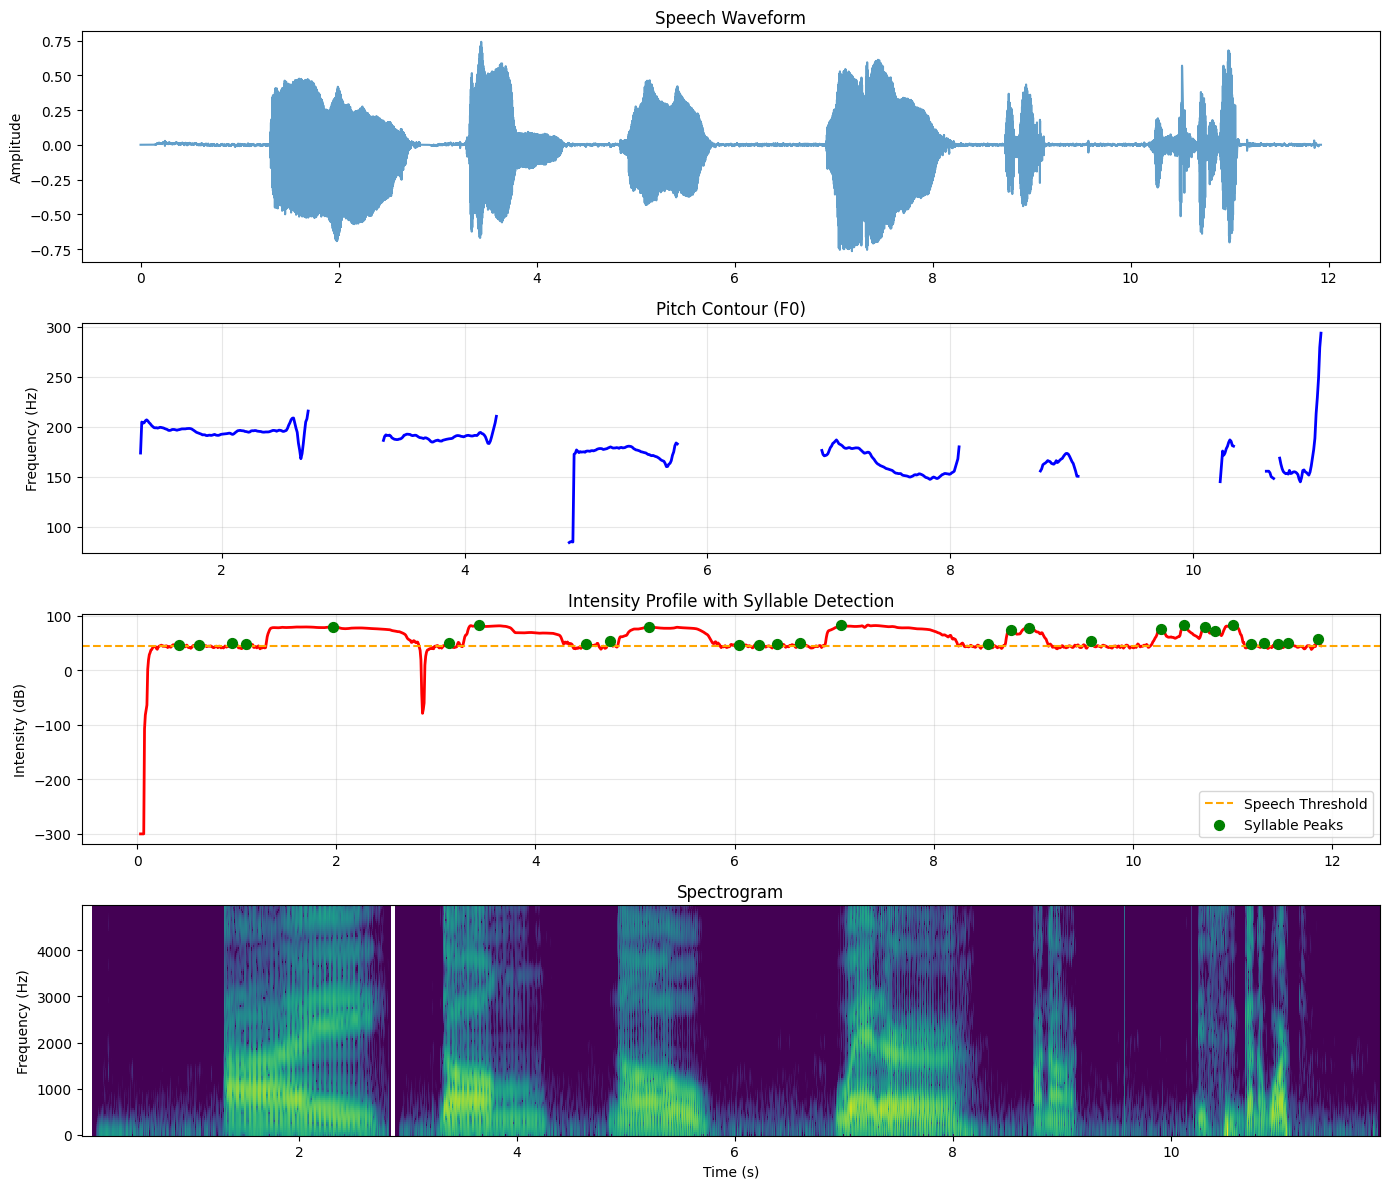

In [6]:
# Test 4: Visualize prosodic features
if sound:
    print("\n=== TEST 4: PROSODIC VISUALIZATION ===")
    
    fig, axes = plt.subplots(4, 1, figsize=(14, 12))
    
    # Plot 1: Waveform
    times = sound.xs()
    axes[0].plot(times, sound.values[0], alpha=0.7)
    axes[0].set_title('Speech Waveform')
    axes[0].set_ylabel('Amplitude')
    
    # Plot 2: Pitch contour
    pitch_times = pitch.xs()
    pitch_values_clean = np.where(pitch_values == 0, np.nan, pitch_values)  # Remove unvoiced segments
    axes[1].plot(pitch_times, pitch_values_clean, 'b-', linewidth=2)
    axes[1].set_title('Pitch Contour (F0)')
    axes[1].set_ylabel('Frequency (Hz)')
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Intensity
    axes[2].plot(intensity_times, intensity_values, 'r-', linewidth=2)
    if 'speech_analysis' in locals():
        axes[2].axhline(y=speech_analysis['speech_threshold'], color='orange', 
                       linestyle='--', label='Speech Threshold')
        # Mark syllable peaks
        if len(speech_analysis['peak_times']) > 0:
            peak_intensities = [intensity_values[np.argmin(np.abs(intensity_times - t))] 
                              for t in speech_analysis['peak_times']]
            axes[2].scatter(speech_analysis['peak_times'], peak_intensities, 
                          color='green', s=50, zorder=5, label='Syllable Peaks')
    axes[2].set_title('Intensity Profile with Syllable Detection')
    axes[2].set_ylabel('Intensity (dB)')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    # Plot 4: Spectrogram
    spectrogram = sound.to_spectrogram()
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    axes[3].pcolormesh(X, Y, sg_db, vmin=sg_db.max() - 70, cmap='viridis')
    axes[3].set_title('Spectrogram')
    axes[3].set_ylabel('Frequency (Hz)')
    axes[3].set_xlabel('Time (s)')
    
    plt.tight_layout()
    plt.show()

In [7]:
# Test 5: Voice quality analysis (jitter, shimmer, HNR)
def analyze_voice_quality(sound):
    """Analyze voice quality metrics that can indicate speech stretch"""
    
    # Get pitch for jitter analysis
    pitch = sound.to_pitch()
    
    # Calculate jitter (pitch period variability)
    pointprocess = parselmouth.praat.call(sound, "To PointProcess (periodic, cc)", 75, 500)
    jitter = parselmouth.praat.call(pointprocess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
    
    # Calculate shimmer (amplitude variability)
    shimmer = parselmouth.praat.call([sound, pointprocess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    
    # Calculate HNR (Harmonics-to-Noise Ratio)
    harmonicity = sound.to_harmonicity()
    hnr = parselmouth.praat.call(harmonicity, "Get mean", 0, 0)
    
    return {
        'jitter_percent': jitter * 100,
        'shimmer_percent': shimmer * 100,
        'hnr_db': hnr
    }

if sound:
    print("\n=== TEST 5: VOICE QUALITY ANALYSIS ===")
    
    try:
        voice_quality = analyze_voice_quality(sound)
        
        print(f"Jitter: {voice_quality['jitter_percent']:.3f}%")
        print(f"Shimmer: {voice_quality['shimmer_percent']:.3f}%")
        print(f"HNR: {voice_quality['hnr_db']:.2f} dB")
        
        # Interpretation
        print("\n📊 VOICE QUALITY INTERPRETATION:")
        
        if voice_quality['jitter_percent'] > 1.04:  # Normal < 1.04%
            print("⚠️ High jitter - may indicate voice instability during stretch")
        else:
            print("✅ Normal jitter levels")
            
        if voice_quality['shimmer_percent'] > 3.81:  # Normal < 3.81%
            print("⚠️ High shimmer - may indicate amplitude instability")
        else:
            print("✅ Normal shimmer levels")
            
        if voice_quality['hnr_db'] < 12:  # Normal > 12 dB
            print("⚠️ Low HNR - may indicate voice quality degradation")
        else:
            print("✅ Good voice quality (high HNR)")
            
    except Exception as e:
        print(f"Voice quality analysis failed: {e}")
        print("This may require voiced speech segments")


=== TEST 5: VOICE QUALITY ANALYSIS ===
Jitter: 0.902%
Shimmer: 3.874%
HNR: 19.31 dB

📊 VOICE QUALITY INTERPRETATION:
✅ Normal jitter levels
⚠️ High shimmer - may indicate amplitude instability
✅ Good voice quality (high HNR)


In [8]:
# Test 6: Compare with Whisper timestamps
def compare_with_whisper():
    """Compare Parselmouth analysis with Whisper timestamps"""
    
    # Get Whisper results (from your existing code)
    try:
        from openai_transcriber import transcribe_with_openai_timestamps
        whisper_words = transcribe_with_openai_timestamps("Stretch 3.mp3")
        
        if whisper_words and 'speech_analysis' in locals():
            print("\n=== TEST 6: PARSELMOUTH vs WHISPER COMPARISON ===")
            
            # Whisper analysis
            whisper_duration = whisper_words[-1]['end'] - whisper_words[0]['start']
            whisper_word_count = len([w for w in whisper_words if w['word'].isalpha()])
            whisper_words_per_sec = whisper_word_count / whisper_duration
            
            print("WHISPER ANALYSIS:")
            print(f"  Duration: {whisper_duration:.2f}s")
            print(f"  Words: {whisper_word_count}")
            print(f"  Words/sec: {whisper_words_per_sec:.2f}")
            print(f"  Estimated syllables: {whisper_word_count * 1.3:.0f}")  # Rough estimate
            print(f"  Estimated syllable rate: {(whisper_word_count * 1.3) / whisper_duration:.2f}")
            
            print("\nPARSELMOUTH ANALYSIS:")
            print(f"  Speech duration: {speech_analysis['speech_duration']:.2f}s")
            print(f"  Detected syllables: {speech_analysis['estimated_syllables']}")
            print(f"  Syllable rate: {speech_analysis['syllable_rate']:.2f}")
            
            print("\n🔍 KEY DIFFERENCES:")
            print(f"  Parselmouth excludes silence more accurately")
            print(f"  Parselmouth uses prosodic features, not word boundaries")
            print(f"  Parselmouth provides voice quality metrics")
            
        else:
            print("\n❌ Could not load Whisper comparison (check openai_transcriber)")
            
    except Exception as e:
        print(f"\n❌ Whisper comparison failed: {e}")

compare_with_whisper()

Using transcription model: gpt-4o-transcribe
Automatically switching to whisper-1 for word timestamp support...
Added word-level timestamp support
Transcription parameters: {'model': 'whisper-1', 'file': <_io.BufferedReader name='Stretch 3.mp3'>, 'response_format': 'verbose_json', 'language': 'en', 'timestamp_granularities': ['word']}
Response type: <class 'openai.types.audio.transcription_verbose.TranscriptionVerbose'>
Response attributes: ['__abstractmethods__', '__annotations__', '__class__', '__class_getitem__', '__class_vars__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__fields__', '__fields_set__', '__firstlineno__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pretty__', '__private_attributes__', '__pydantic_complete_

In [9]:
# Test 7: Generate comprehensive stretch report
def generate_stretch_report(sound, speech_analysis=None, voice_quality=None):
    """Generate a comprehensive stretch analysis report using Parselmouth"""
    
    print("\n" + "="*60)
    print("🎯 COMPREHENSIVE STRETCH ANALYSIS REPORT")
    print("   Using Parselmouth + Praat Algorithms")
    print("="*60)
    
    # Basic audio info
    print(f"\n📁 AUDIO FILE INFORMATION:")
    print(f"   File: Stretch 3.mp3")
    print(f"   Duration: {sound.duration:.2f} seconds")
    print(f"   Sample rate: {sound.sampling_frequency} Hz")
    
    # Speech timing analysis
    if speech_analysis:
        print(f"\n⏱️ SPEECH TIMING ANALYSIS:")
        print(f"   Speech duration: {speech_analysis['speech_duration']:.2f}s ({speech_analysis['speech_percentage']:.1f}% of total)")
        print(f"   Detected syllables: {speech_analysis['estimated_syllables']}")
        print(f"   Syllable rate: {speech_analysis['syllable_rate']:.2f} syllables/second")
        
        # Classification
        if speech_analysis['syllable_rate'] < 3.5:
            stretch_verdict = "🔴 STRETCHED SPEECH DETECTED"
            severity = "Significant" if speech_analysis['syllable_rate'] < 2.5 else "Moderate"
        elif speech_analysis['syllable_rate'] > 6.5:
            stretch_verdict = "🟡 RAPID SPEECH DETECTED"
            severity = "Fast"
        else:
            stretch_verdict = "🟢 NORMAL SPEECH RATE"
            severity = "Normal"
            
        print(f"\n🎯 PRIMARY ASSESSMENT: {stretch_verdict}")
        print(f"   Severity: {severity}")
    
    # Voice quality analysis
    if voice_quality:
        print(f"\n🎤 VOICE QUALITY METRICS:")
        print(f"   Jitter: {voice_quality['jitter_percent']:.3f}% {'(High)' if voice_quality['jitter_percent'] > 1.04 else '(Normal)'}")
        print(f"   Shimmer: {voice_quality['shimmer_percent']:.3f}% {'(High)' if voice_quality['shimmer_percent'] > 3.81 else '(Normal)'}")
        print(f"   HNR: {voice_quality['hnr_db']:.2f} dB {'(Low)' if voice_quality['hnr_db'] < 12 else '(Good)'}")
    
    # Recommendations
    print(f"\n💡 CLINICAL RECOMMENDATIONS:")
    if speech_analysis and speech_analysis['syllable_rate'] < 3.5:
        print(f"   • Speech shows signs of prolongation/stretch")
        print(f"   • Consider speech therapy for rate normalization")
        print(f"   • Monitor prosodic patterns in future assessments")
    else:
        print(f"   • Speech rate within normal parameters")
        print(f"   • Continue regular monitoring")
    
    print(f"\n✅ ANALYSIS COMPLETE - Parselmouth/Praat based assessment")
    print("="*60)

# Generate the final report
if sound:
    speech_analysis_data = speech_analysis if 'speech_analysis' in locals() else None
    voice_quality_data = voice_quality if 'voice_quality' in locals() else None
    
    generate_stretch_report(sound, speech_analysis_data, voice_quality_data)


🎯 COMPREHENSIVE STRETCH ANALYSIS REPORT
   Using Parselmouth + Praat Algorithms

📁 AUDIO FILE INFORMATION:
   File: Stretch 3.mp3
   Duration: 11.92 seconds
   Sample rate: 44100.0 Hz

⏱️ SPEECH TIMING ANALYSIS:
   Speech duration: 8.30s (69.6% of total)
   Detected syllables: 29
   Syllable rate: 3.49 syllables/second

🎯 PRIMARY ASSESSMENT: 🔴 STRETCHED SPEECH DETECTED
   Severity: Moderate

🎤 VOICE QUALITY METRICS:
   Jitter: 0.902% (Normal)
   Shimmer: 3.874% (High)
   HNR: 19.31 dB (Good)

💡 CLINICAL RECOMMENDATIONS:
   • Speech shows signs of prolongation/stretch
   • Consider speech therapy for rate normalization
   • Monitor prosodic patterns in future assessments

✅ ANALYSIS COMPLETE - Parselmouth/Praat based assessment
